# EDA

In [ ]:
import pandas as pd
import datetime

In [ ]:
data = pd.read_csv('../data/rapido_clean_data.csv')
data.head()

,ts,number
0,2018-04-07 07:07:17,14626
1,2018-04-07 07:32:27,85490
2,2018-04-07 07:36:44,5408
3,2018-04-07 07:38:00,58940
4,2018-04-07 07:39:29,5408


# Top 50 users with most bookings

In [ ]:
%matplotlib inline

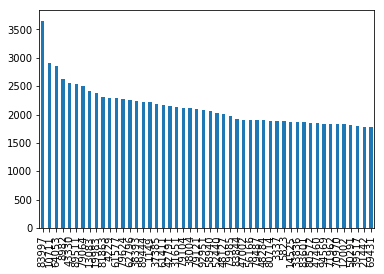

In [ ]:
data.number.value_counts()[0:50].plot(kind='bar')

# Bottom 50 users

In [ ]:
data.number.value_counts()[-50:]

47714    1
10876    1
54541    1
80465    1
96857    1
84574    1
35430    1
34052    1
12521    1
75053    1
51869    1
92841    1
84667    1
35459    1
38127    1
46315    1
60047    1
10903    1
93909    1
76471    1
47748    1
83158    1
14996    1
95442    1
46316    1
38120    1
3831     1
43651    1
60043    1
19096    1
74970    1
84652    1
79139    1
43667    1
48875    1
14976    1
2697     1
72363    1
1286     1
99637    1
98004    1
50406    1
61159    1
76462    1
5377     1
51860    1
13575    1
24306    1
75044    1
18349    1
Name: number, dtype: int64

In [ ]:
data.head()

,ts,number
0,2018-04-07 07:07:17,14626
1,2018-04-07 07:32:27,85490
2,2018-04-07 07:36:44,5408
3,2018-04-07 07:38:00,58940
4,2018-04-07 07:39:29,5408


In [ ]:
data.head()

,ts,number
0,2018-04-07 07:07:17,14626
1,2018-04-07 07:32:27,85490
2,2018-04-07 07:36:44,5408
3,2018-04-07 07:38:00,58940
4,2018-04-07 07:39:29,5408


# Feature Engineering

- is_weekend 
- is_weekday
- is_start_of_week
- is_wednesday
- is_end_of_Week
- is_holidays

In [ ]:
data.dtypes

ts        object
number     int64
dtype: object

In [ ]:
data.ts = data.ts.astype('datetime64[ns]')

In [ ]:
data.dtypes

ts        datetime64[ns]
number             int64
dtype: object

In [ ]:
data.head()

,ts,number
0,2018-04-07 07:07:17,14626
1,2018-04-07 07:32:27,85490
2,2018-04-07 07:36:44,5408
3,2018-04-07 07:38:00,58940
4,2018-04-07 07:39:29,5408


In [ ]:
data['is_weekend'] = data.ts.dt.dayofweek.isin([5,6])
data.head()

,ts,number,is_weekend
0,2018-04-07 07:07:17,14626,True
1,2018-04-07 07:32:27,85490,True
2,2018-04-07 07:36:44,5408,True
3,2018-04-07 07:38:00,58940,True
4,2018-04-07 07:39:29,5408,True


In [ ]:
data['is_weekday'] = ~data['is_weekend']
data['is_start_of_week'] = data.ts.dt.dayofweek.isin([0,1])
data['is_end_of_week'] = data.ts.dt.dayofweek.isin([3,4])
data['is_wednesday'] = data.ts.dt.dayofweek.isin([2])

In [ ]:
data.ts.max()

Timestamp('2019-04-07 23:59:59')

In [ ]:
data.ts.min()

Timestamp('2018-04-07 01:23:31')

# holiday 

In [ ]:
holidays = pd.read_csv('../data/holiday.csv')
holidays.head()

,DAY,DATE,HOLIDAY
0,Monday,"Jan 01, 2018",New Year's Day
1,Sunday,"Jan 14, 2018",Makar Sankranti / Pongal
2,Friday,"Jan 26, 2018",Republic Day
3,Wednesday,"Feb 14, 2018",Maha Shivaratri
4,Friday,"Mar 02, 2018",Holi


In [ ]:
holidays.dtypes

DAY        object
DATE       object
HOLIDAY    object
dtype: object

In [ ]:
holidays.DATE = pd.to_datetime(holidays.DATE)
holidays.dtypes

DAY                object
DATE       datetime64[ns]
HOLIDAY            object
dtype: object

In [ ]:
data.head()

,ts,number,is_weekend,is_weekday,is_start_of_week,is_end_of_week,is_wednesday
0,2018-04-07 07:07:17,14626,True,False,False,False,False
1,2018-04-07 07:32:27,85490,True,False,False,False,False
2,2018-04-07 07:36:44,5408,True,False,False,False,False
3,2018-04-07 07:38:00,58940,True,False,False,False,False
4,2018-04-07 07:39:29,5408,True,False,False,False,False


In [ ]:
holidays.head()

,DAY,DATE,HOLIDAY
0,Monday,2018-01-01,New Year's Day
1,Sunday,2018-01-14,Makar Sankranti / Pongal
2,Friday,2018-01-26,Republic Day
3,Wednesday,2018-02-14,Maha Shivaratri
4,Friday,2018-03-02,Holi


In [ ]:
data['date'] = data.ts.dt.date
data.head()

,ts,number,is_weekend,is_weekday,is_start_of_week,is_end_of_week,is_wednesday,date
0,2018-04-07 07:07:17,14626,True,False,False,False,False,2018-04-07
1,2018-04-07 07:32:27,85490,True,False,False,False,False,2018-04-07
2,2018-04-07 07:36:44,5408,True,False,False,False,False,2018-04-07
3,2018-04-07 07:38:00,58940,True,False,False,False,False,2018-04-07
4,2018-04-07 07:39:29,5408,True,False,False,False,False,2018-04-07


In [ ]:
data.date = pd.to_datetime(data.date)

In [ ]:
data['is_holiday'] = data.date.isin(holidays.DATE)
data.head()

,ts,number,is_weekend,is_weekday,is_start_of_week,is_end_of_week,is_wednesday,date,is_holiday
0,2018-04-07 07:07:17,14626,True,False,False,False,False,2018-04-07,False
1,2018-04-07 07:32:27,85490,True,False,False,False,False,2018-04-07,False
2,2018-04-07 07:36:44,5408,True,False,False,False,False,2018-04-07,False
3,2018-04-07 07:38:00,58940,True,False,False,False,False,2018-04-07,False
4,2018-04-07 07:39:29,5408,True,False,False,False,False,2018-04-07,False


In [ ]:
data.drop(labels=['ts'], axis = 1).to_csv('../data/rapido_feature_engineered.csv', 
                                          index=False)

In [ ]:
data.shape

(8381556, 9)